In [5]:
# By Dennies Bor
import os
import pandas as pd
import matplotlib.pyplot as plt
path = r'C:\Users\borki\Desktop\TTRT_DATA\data1' # path to the directory with your files
os.chdir(path)

calibration = 'cal_spec.txt'   #Name of the calibration file
sky = 'sky_spec.txt'
sep = '    '  #The text files are seperated by four white spaces

<ipython-input-6-ac2b2011b6ef>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfcal_spec = pd.read_csv(calibration,delimiter= sep)


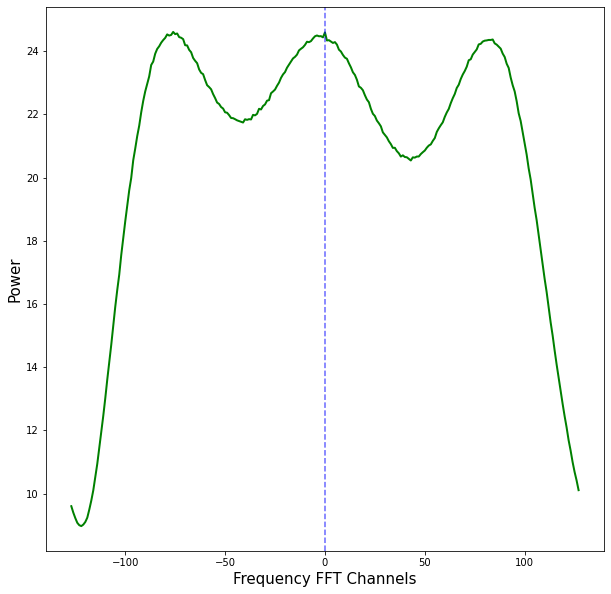

In [6]:
# plot the system spectrum
dfcal_spec = pd.read_csv(calibration,delimiter= sep)
dfcal_spec = pd.DataFrame(dfcal_spec)
dfcal_spec.columns = ['freq','power']
y = dfcal_spec['power']
x = dfcal_spec['freq']
plt.figure(figsize= (10,10))
plt.xlabel('Frequency FFT Channels', fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.plot(x,y,'-',color='g',linewidth= '2')
plt.axvline(x = 0,ls = '--',color='b',alpha = 0.6)
plt.savefig('Pow_vs_FFTCALSPEC.jpg')
plt.show()

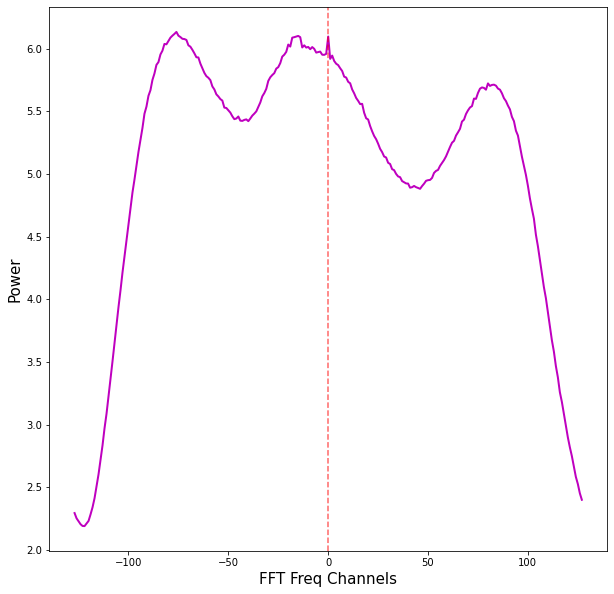

In [7]:
# plot the sky spectrum
dfsky_spec = pd.read_csv(sky,delimiter=sep,engine ='python')
dfsky_spec = pd.DataFrame(dfsky_spec)
dfsky_spec.columns = ['freq','power']
y = dfsky_spec['power']
x = dfsky_spec['freq']
plt.figure(figsize= (10,10))
plt.xlabel('FFT Freq Channels', fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.plot(x,y,'-',color='m',linewidth= '2')
plt.axvline(x = 0,ls = '--',color='r',alpha = 0.6)
plt.savefig('Pow_vs_FFTSKYSPEC.jpg')
plt.show()

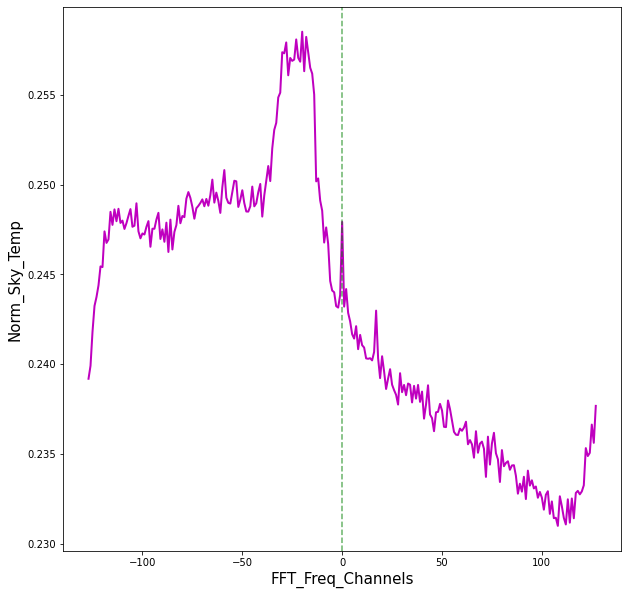

In [9]:
# Normalized sky - cal plot
# divide hydrogen spectrum by load spectrum
dfsky_spec['norm_spec'] = dfsky_spec['power']/dfcal_spec['power']
y = dfsky_spec['norm_spec']
x = dfsky_spec['freq']
plt.figure(figsize= (10,10))
plt.xlabel('FFT_Freq_Channels', fontsize = 15)
plt.ylabel('Norm_Sky_Temp', fontsize = 15)
plt.plot(x,y,'-',color='m',linewidth= '2')
plt.axvline(x = 0,ls = '--',color='g',alpha = 0.6)
plt.savefig('NORMPow_vs_FFTCALSPEC.jpg')
plt.show()


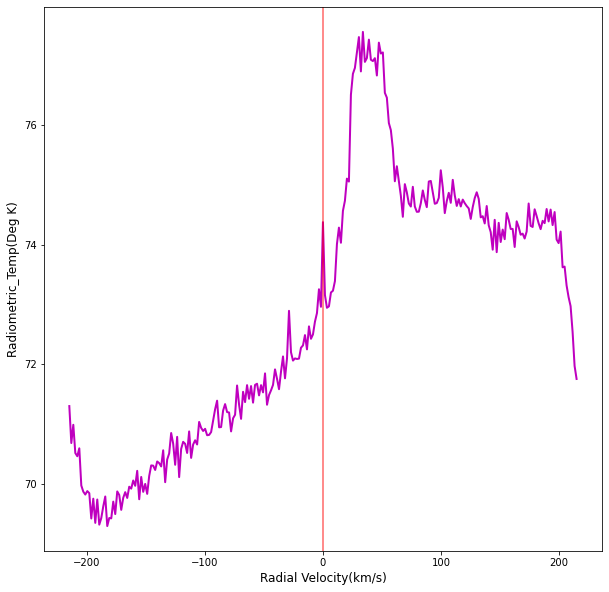

In [10]:
T = 300
# convert to radial velocities in km/s
# convert to deg K by multiplying normalized sky temp with 35
dfsky_spec['sky_temp'] = dfsky_spec['norm_spec'].apply(lambda x: x*T)
dfsky_spec['rad_vel'] = dfsky_spec['freq'].apply(lambda x: x*-1.69)
y = dfsky_spec['sky_temp']
x = dfsky_spec['rad_vel']
plt.figure(figsize= (10,10))
plt.xlabel('Radial Velocity(km/s)', fontsize = 12)
plt.ylabel('Radiometric_Temp(Deg K)', fontsize = 12)
plt.plot(x,y,'-',color='m',linewidth= '2')
plt.axvline(x = 0,ls = '-',color='r',alpha = 0.6)
plt.savefig('Rad_vel_vs_Temp_data1.jpg')
plt.show()